О наборе данных  
Этот набор данных содержит подробные характеристики и официальные цены запуска различных моделей мобильных телефонов от разных компаний. Он предоставляет информацию о характеристиках смартфонов, тенденциях в ценах и конкурентоспособности брендов в разных странах. Набор данных включает ключевые характеристики, такие как объем оперативной памяти (RAM), характеристики камеры, емкость аккумулятора, детали процессора и размер экрана.  

Одним из важных аспектов этого набора данных является информация о ценах. Указанные цены представляют собой официальные цены запуска мобильных телефонов на момент их первого появления на рынке. Цены варьируются в зависимости от страны и периода запуска, то есть более старые модели отражают свои первоначальные цены запуска, а новые модели включают свои последние цены запуска. Это делает набор данных ценным для изучения тенденций в ценах с течением времени и сравнения доступности смартфонов в разных регионах.  

Характеристики:  

- **Название компании**: Бренд или производитель мобильного телефона.  
- **Название модели**: Конкретная модель смартфона.  
- **Вес телефона**: Вес мобильного телефона (в граммах).  
- **Оперативная память (RAM)**: Объем оперативной памяти устройства (в ГБ).  
- **Фронтальная камера**: Разрешение фронтальной (селфи) камеры (в МП).  
- **Основная камера**: Разрешение основной задней камеры (в МП).  
- **Процессор**: Чипсет или процессор, используемый в устройстве.  
- **Емкость аккумулятора**: Размер аккумулятора смартфона (в мАч).  
- **Размер экрана**: Размер дисплея смартфона (в дюймах).  
- **Цена запуска (Пакистан, Индия, Китай, США, Дубай)**: Официальная цена запуска телефона в соответствующей стране на момент его выпуска. Цены варьируются в зависимости от года запуска телефона.  
- **Год запуска**: Год официального выпуска мобильного телефона.

In [3]:
# импорт бибилиотек дл работы с данными
import pandas as pd 
import numpy as np 
# иморт бибилиотек для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns 
# убираем надоедливые ошибки
import warnings

warnings.filterwarnings('ignore')
# визуализация выбросов
import missingno as mno

# подключение к бд
import pymysql

# Добавление пути к config
import os
import sys


root_path = os.path.abspath(os.path.join(os.getcwd(), "../../")) 
sys.path.append(root_path)
from config import my_sql_connect


In [4]:
# Подключение к базе


conn = pymysql.connect(
    host=my_sql_connect['host'],
    user=my_sql_connect['user'],
    password=my_sql_connect['password'],
    db=my_sql_connect['Database_name'],
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

In [5]:
# Запрос и преобразование в DataFrame
try:
    with conn.cursor() as cursor:
        cursor.execute("SELECT * FROM Mobiles_Dataset")
        result = cursor.fetchall()
        df = pd.DataFrame(result)  # автоматически создаст колонки из ключей словарей
finally:
    conn.close()

In [6]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

<Axes: >

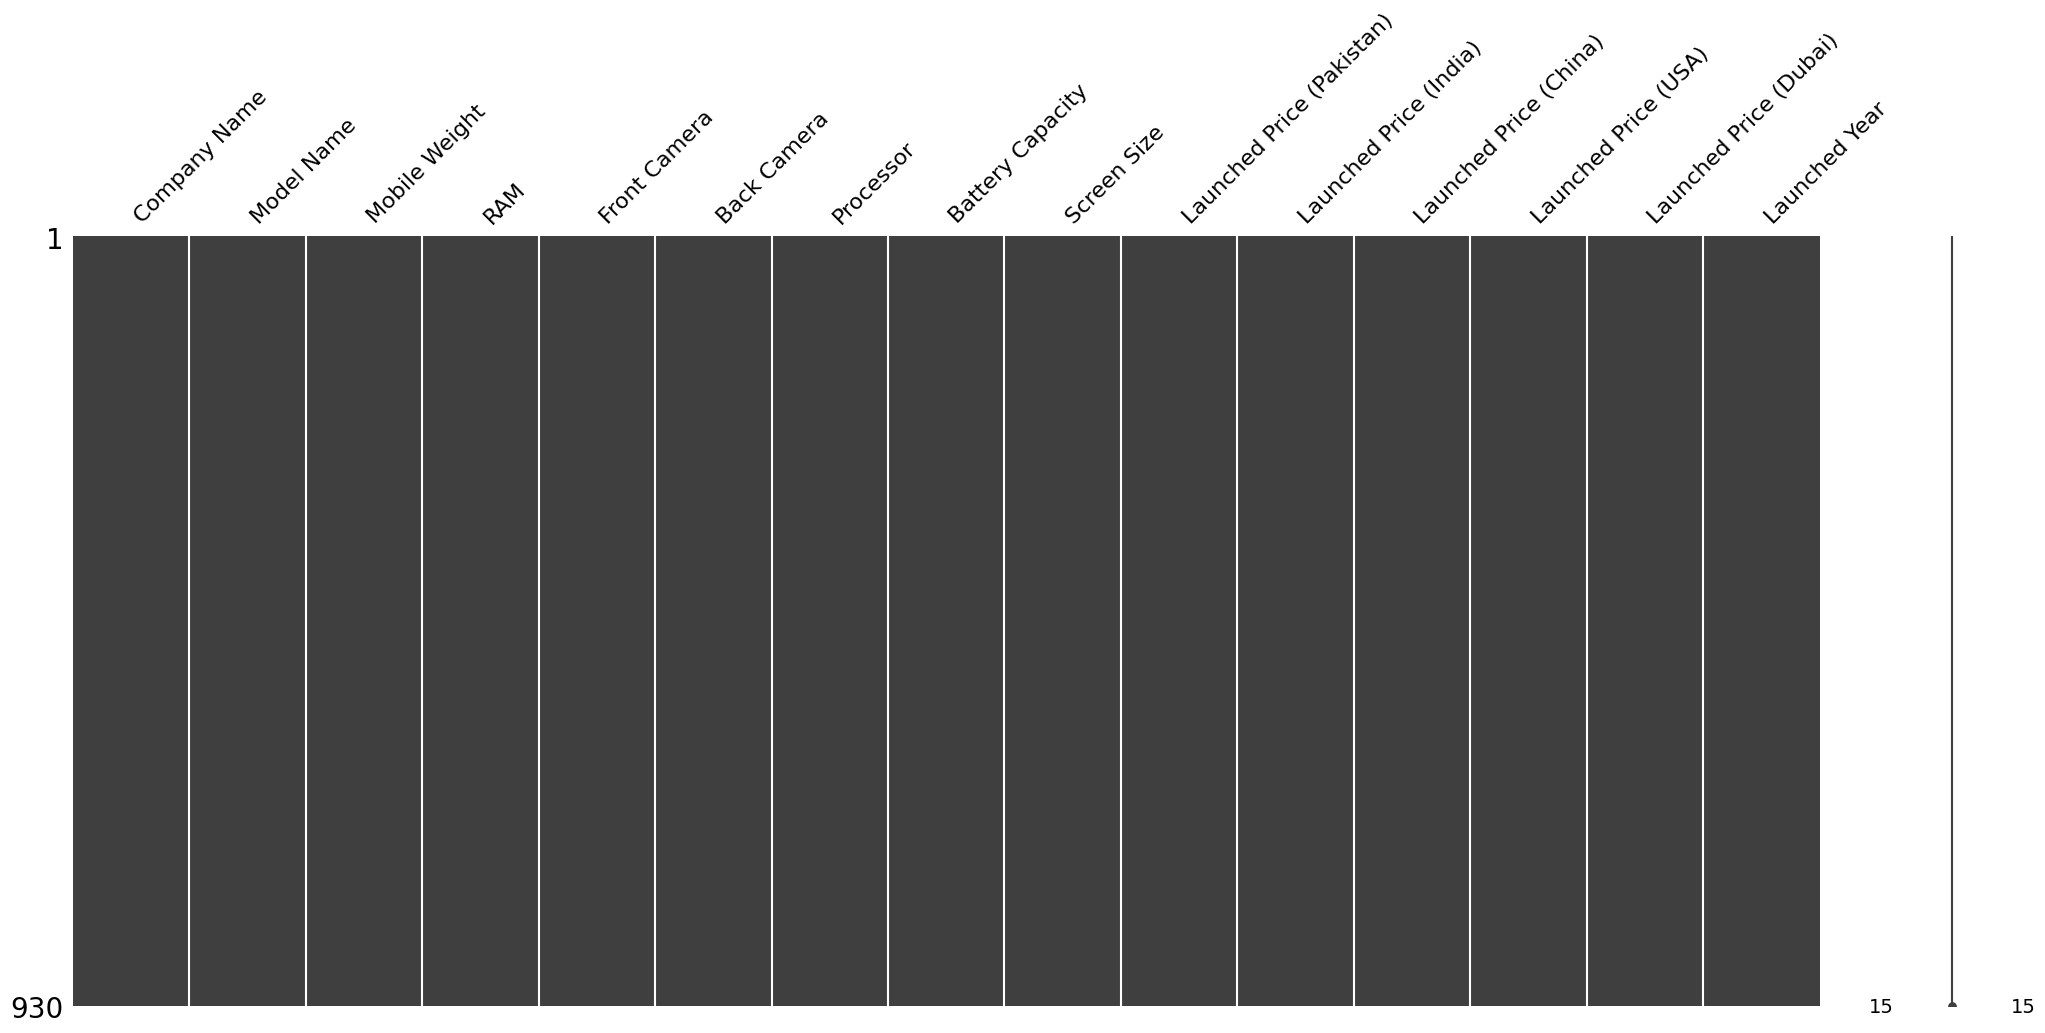

In [8]:
mno.matrix(df)

In [9]:
country = [
    'Launched Price (Pakistan)',
    'Launched Price (India)',
    'Launched Price (China)',
    'Launched Price (USA)',
    'Launched Price (Dubai)'
           ]
df[country] = df[country].apply(
    lambda x: x.str.strip().str.replace(r'[^\d]', "", regex=True)
)
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,259999,94999,6499,949,3399,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,66220,23999,2099,280,1029,2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,71220,25999,2299,300,1099,2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,604999,164999,13999,1899,7199,2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,544999,176999,15999,1719,7699,2024


In [10]:
character = [
    'Mobile Weight',
    'RAM',
    'Front Camera',
    'Back Camera',
    'Battery Capacity',
    'Screen Size'
]
for char in character:
    df[char] = df[char].str.replace(r'[^\d]','', regex=True).astype(float)

    

In [11]:
categorical_features = df.select_dtypes(include='object').columns.to_list()
target = ['Launched Price (Pakistan)',
 'Launched Price (India)',
 'Launched Price (China)',
 'Launched Price (USA)',
 'Launched Price (Dubai)']
for tg in target:
    categorical_features.remove(tg)
categorical_features

['Company Name', 'Model Name', 'Processor']

In [12]:
data_set= {
    'Pakistan' : df.drop(
        ['Launched Price (India)','Launched Price (China)','Launched Price (USA)','Launched Price (Dubai)'],
            axis = 1),
    'India' : df.drop(
        ['Launched Price (China)','Launched Price (USA)','Launched Price (Dubai)','Launched Price (Pakistan)'],
            axis = 1),
    'China' : df.drop(
        ['Launched Price (India)','Launched Price (USA)','Launched Price (Dubai)','Launched Price (Pakistan)'],
            axis = 1),
    'USA' : df.drop(
        ['Launched Price (India)','Launched Price (China)','Launched Price (Dubai)','Launched Price (Pakistan)'],
            axis = 1),
    'Dubai' : df.drop(
        ['Launched Price (India)','Launched Price (China)','Launched Price (USA)','Launched Price (Pakistan)'],
            axis = 1)
}

In [13]:
# Курсы валют к доллару (примерные значения)
exchange_rates = {
    'Pakistan': 0.0057,  # 1 PKR = 0.0057 USD
    'India': 0.013,      # 1 INR = 0.013 USD
    'China': 0.15,       # 1 CNY = 0.15 USD
    'USA': 1.0,          # 1 USD = 1.0 USD
    'Dubai': 0.27        # 1 AED = 0.27 USD
}

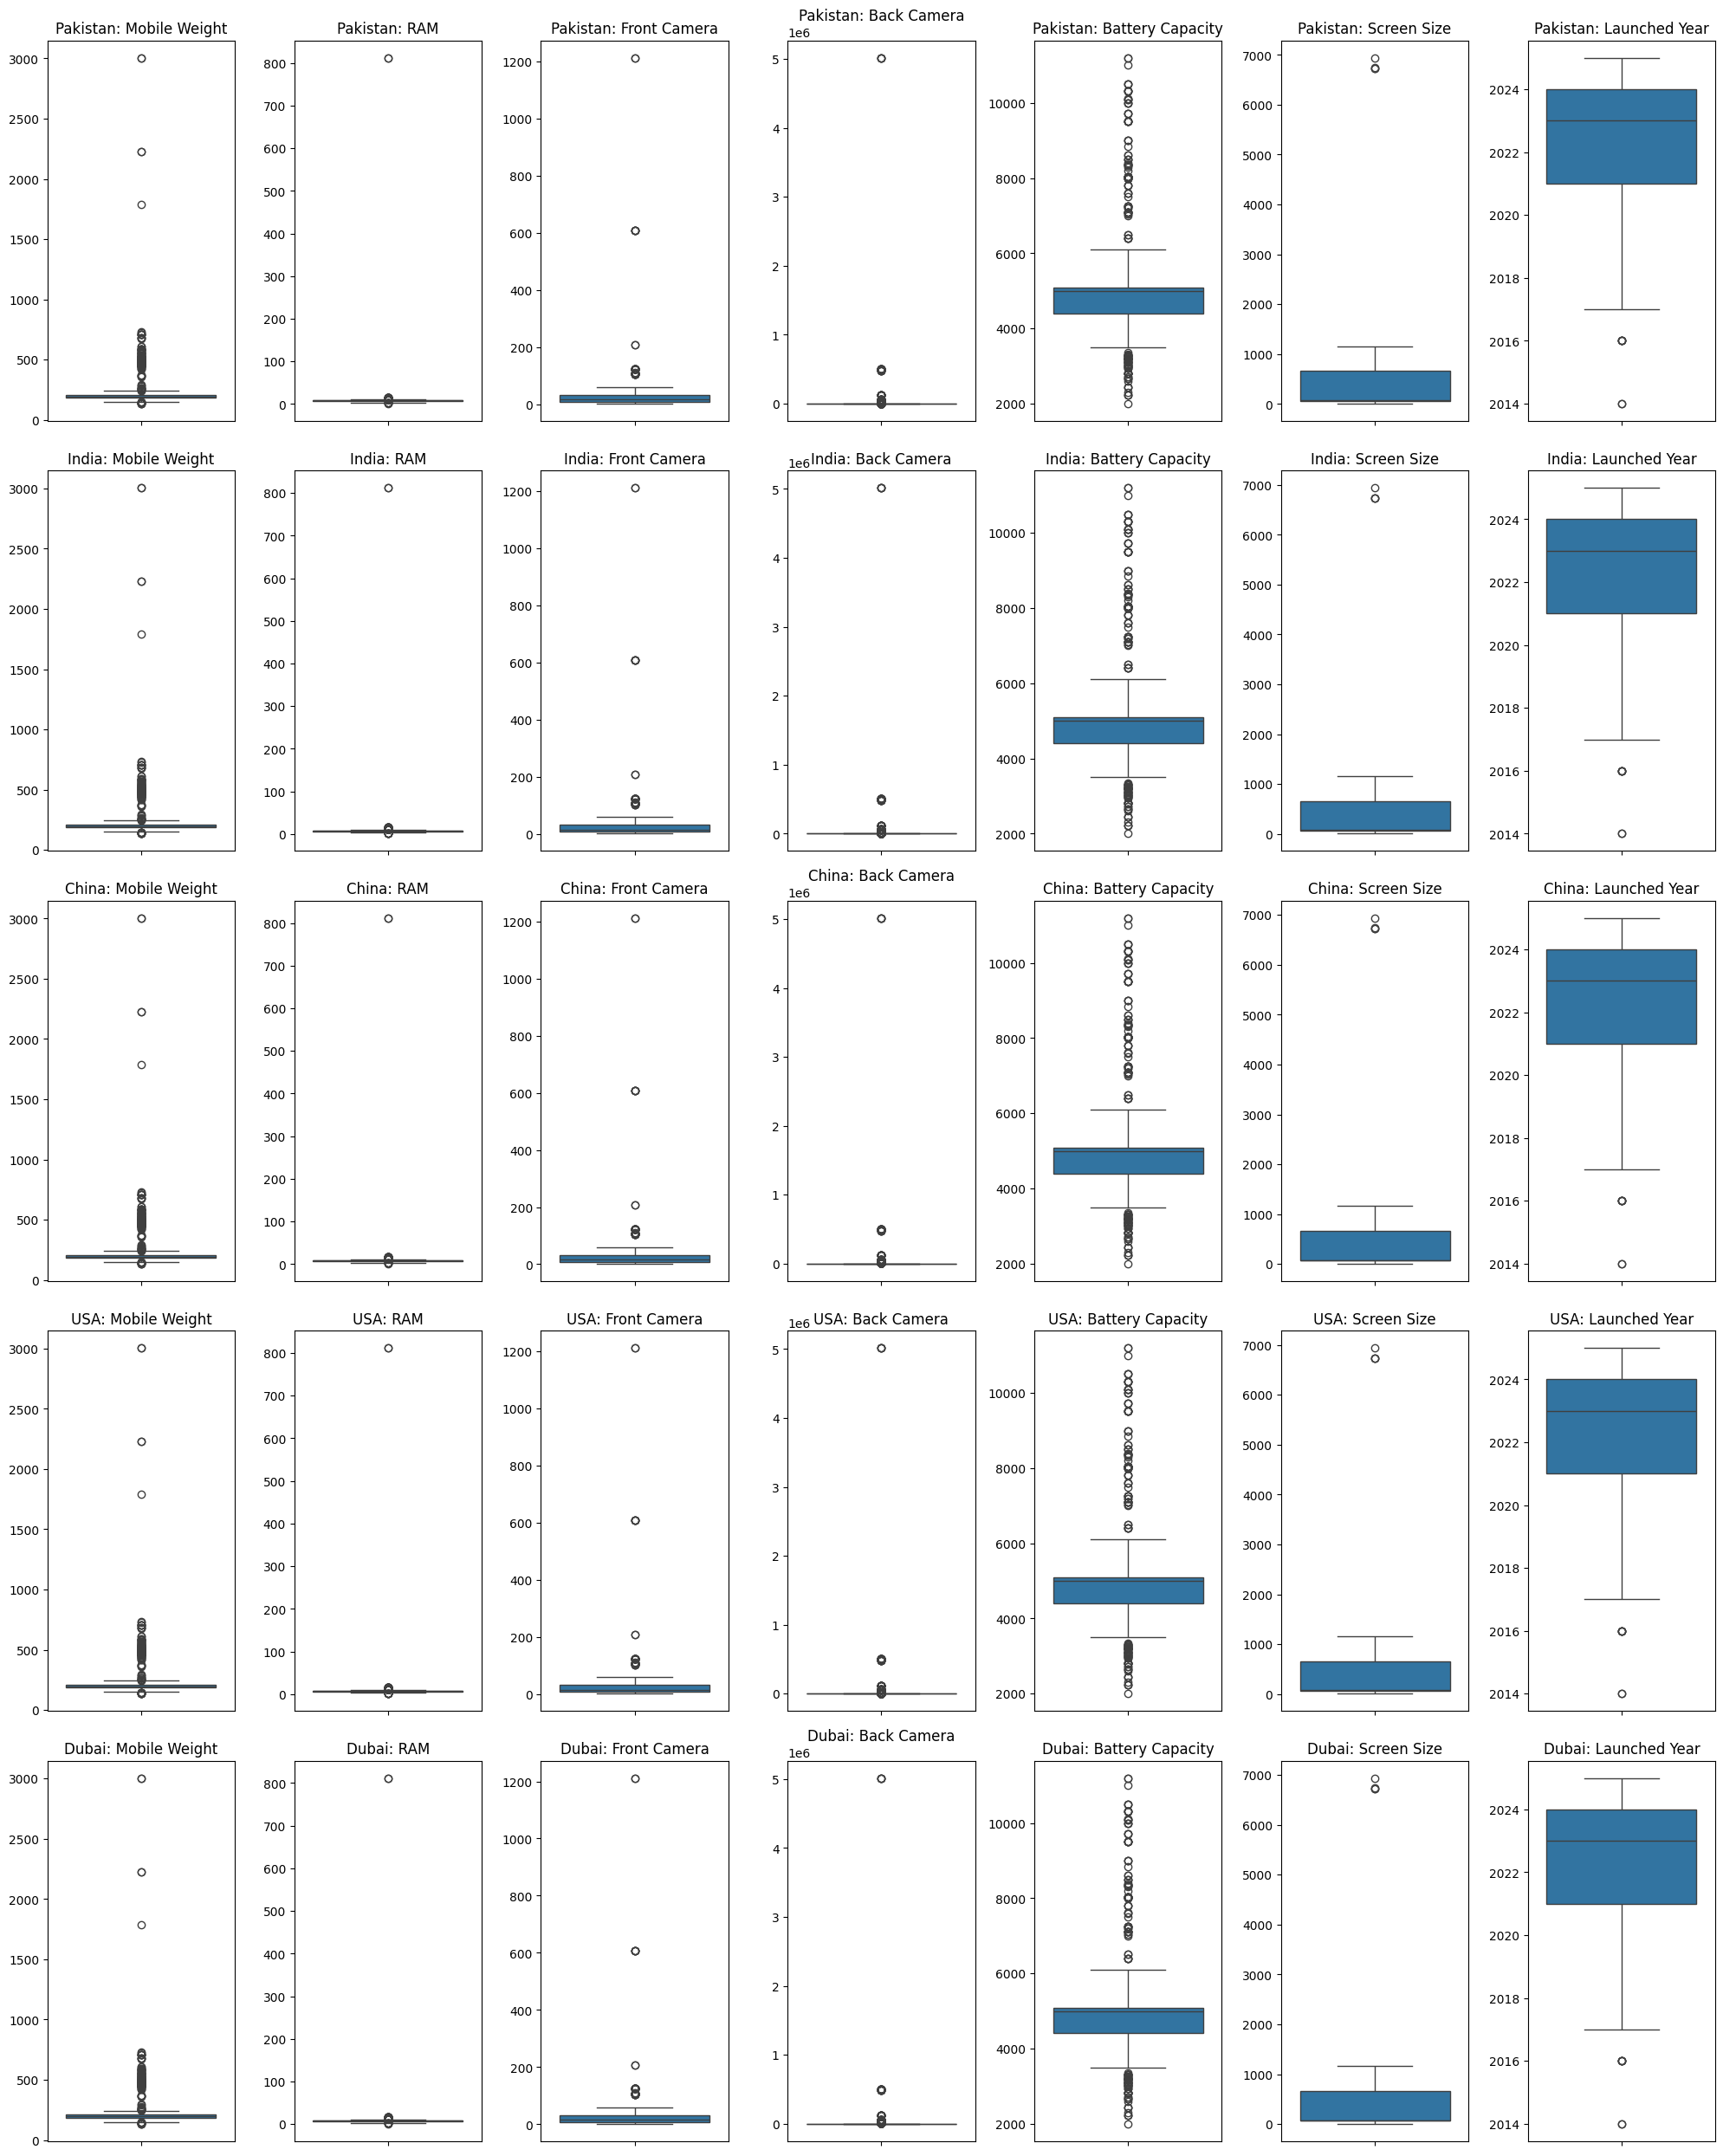

In [14]:
plt.figure(figsize=(20, 25))

for country_idx, country in enumerate((data_set).keys(), 1):
    # Берем данные для конкретной страны
    country_df = data_set[country]
    
    # Определяем название колонки с ценой (например, 'Launched Price (Pakistan)')
    price_column = [col for col in country_df.columns if 'Launched Price' in col][0]
    
    # Выбираем все числовые признаки, кроме категориальных
    numeric_features = country_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_features = [f for f in numeric_features if f not in [price_column, 'Year Launched']]
    
    # Строим boxplot для каждого числового признака
    for feat_idx, feature in enumerate(numeric_features, 1):
        plt.subplot(len(data_set), len(numeric_features), (country_idx-1)*len(numeric_features) + feat_idx)
        sns.boxplot(y=country_df[feature])
        plt.title(f'{country}: {feature}')
        plt.ylabel('')

plt.tight_layout()
plt.show()

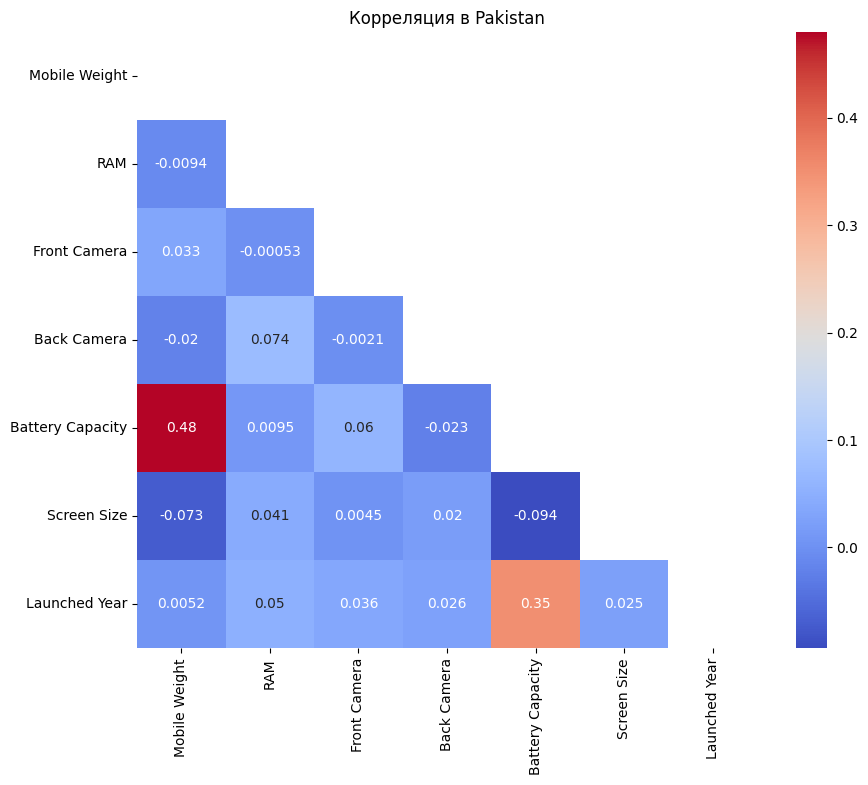

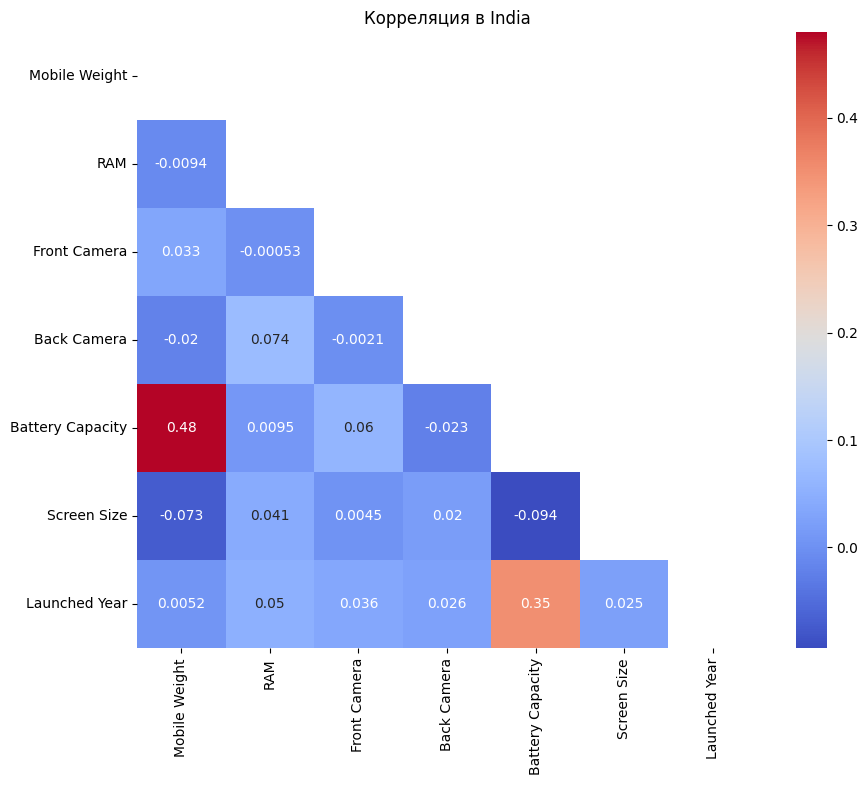

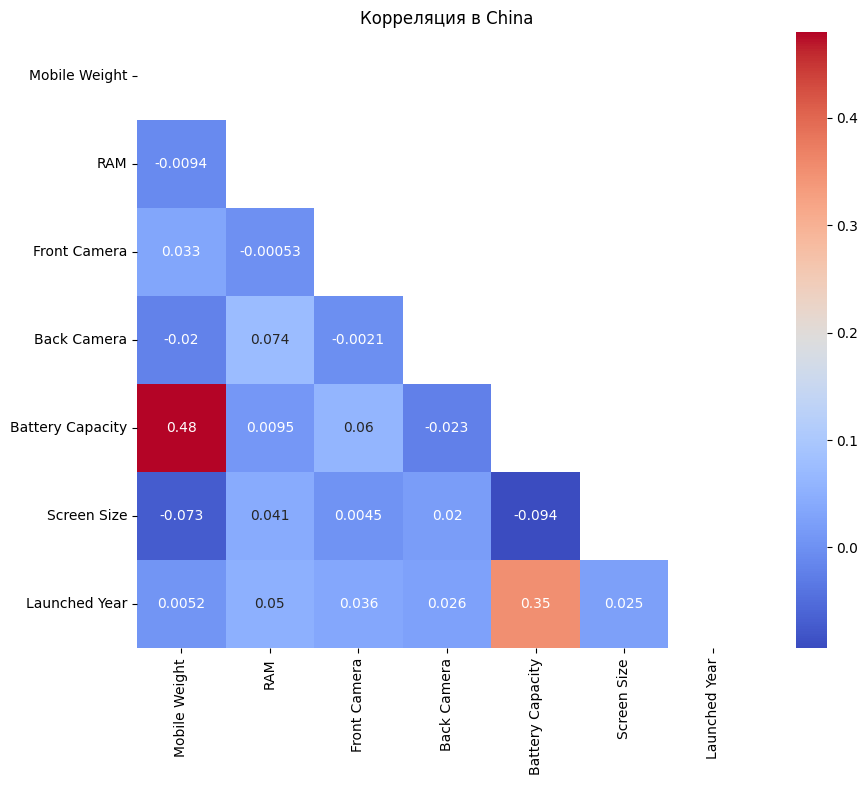

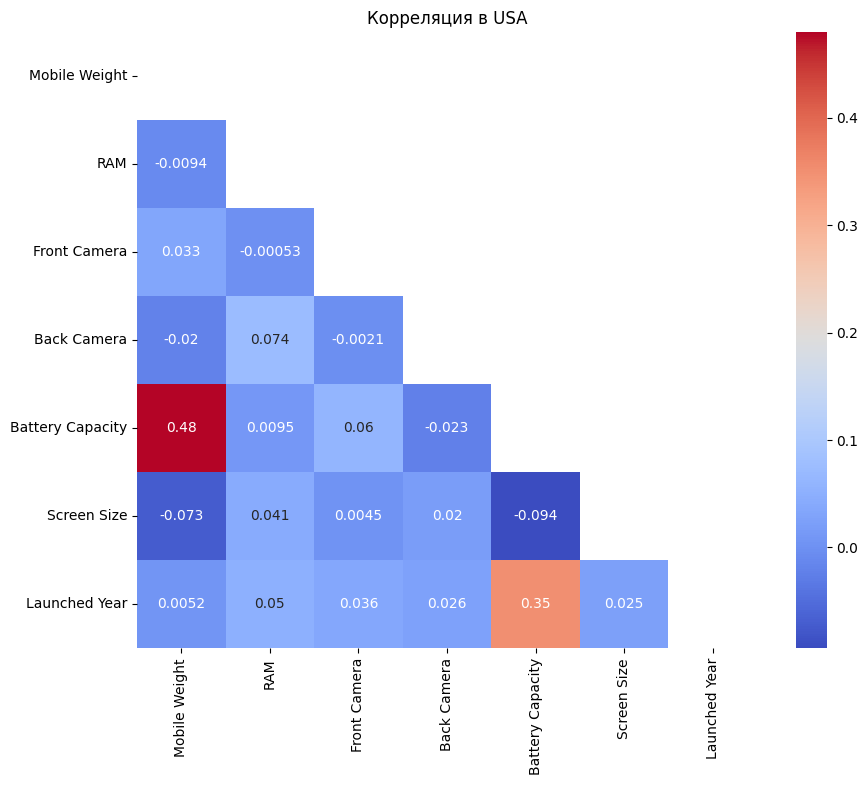

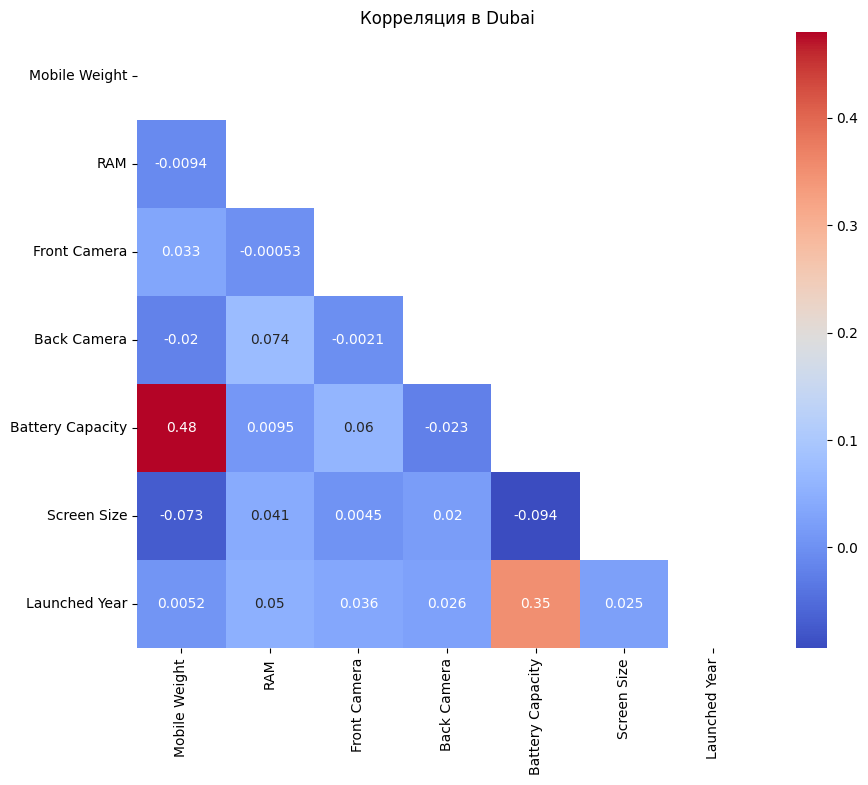

In [15]:
for country in data_set:
    country_df = data_set[country]
    price_column = [col for col in country_df.columns if 'Launched Price' in col][0]
    
    # Выбираем числовые признаки + цену
    numeric_features = country_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        country_df[numeric_features].corr(),
        annot=True,
        cmap='coolwarm',
        mask=np.triu(np.ones_like(country_df[numeric_features].corr()))
    )
    plt.title(f'Корреляция в {country}')
    plt.show()

In [16]:


def target_encode_dataset(data_set, categorical_features, target_suffix='Launched Price', fillna=True):
    """
    Применяет ручное Target Encoding к каждому датафрейму в data_set.

    Параметры:
        data_set (dict): Словарь, где ключи — это названия стран, а значения — датафреймы.
        categorical_features (list): Список категориальных признаков для кодирования.
        target_suffix (str): Суффикс целевой переменной (например, 'Launched Price').
        fillna (bool): Если True, заполняет пропущенные значения средним значением целевой переменной.
    """
    for country, df in data_set.items():
        # Определяем целевую переменную для текущей страны
        target = f'{target_suffix} ({country})'
        
        # Преобразуем целевую переменную в числовой тип
        df[target] = pd.to_numeric(df[target], errors='coerce')
        
        # Проверяем, есть ли пропущенные значения после преобразования
        if df[target].isna().any():
            print(f"Внимание: в целевой переменной '{target}' есть пропущенные значения (NaN).")
            
            # Заполняем пропущенные значения средним значением целевой переменной
            if fillna:
                mean_value = df[target].mean()
                df[target].fillna(mean_value, inplace=True)
                print(f"Пропущенные значения в '{target}' заполнены средним значением: {mean_value}")
        # Конвертируем целевую переменную в доллары (если указаны курсы валют)
        if exchange_rates and country in exchange_rates:
            exchange_rate = exchange_rates[country]
            df[target] = df[target] * exchange_rate
            print(f"Целевая переменная '{target}' конвертирована в доллары по курсу {exchange_rate}.")
        
        # Ручное кодирование для каждого категориального признака
        for col in categorical_features:
            # Вычисляем среднее значение целевой переменной для каждой категории
            mean_encoding = df.groupby(col)[target].mean().to_dict()
            
            # Заменяем категории на их средние значения
            df[col] = df[col].map(mean_encoding)
        
        # Обновляем датафрейм в словаре
        data_set[country] = df

    return data_set

In [17]:

# Применяем функцию к data_set
data_set_encoded = target_encode_dataset(data_set, categorical_features)


Внимание: в целевой переменной 'Launched Price (Pakistan)' есть пропущенные значения (NaN).
Пропущенные значения в 'Launched Price (Pakistan)' заполнены средним значением: 125436.06350914962
Целевая переменная 'Launched Price (Pakistan)' конвертирована в доллары по курсу 0.0057.
Целевая переменная 'Launched Price (India)' конвертирована в доллары по курсу 0.013.
Целевая переменная 'Launched Price (China)' конвертирована в доллары по курсу 0.15.
Целевая переменная 'Launched Price (USA)' конвертирована в доллары по курсу 1.0.
Целевая переменная 'Launched Price (Dubai)' конвертирована в доллары по курсу 0.27.


In [18]:
data_set['China']

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (China),Launched Year
0,1077.239691,869.85,174.0,6.0,12.0,48.0,952.350000,3600.0,61.0,869.85,2024
1,1077.239691,914.85,174.0,6.0,12.0,48.0,952.350000,3600.0,61.0,914.85,2024
2,1077.239691,974.85,174.0,6.0,12.0,48.0,952.350000,3600.0,61.0,974.85,2024
3,1077.239691,929.85,203.0,6.0,12.0,48.0,952.350000,4200.0,67.0,929.85,2024
4,1077.239691,974.85,203.0,6.0,12.0,48.0,952.350000,4200.0,67.0,974.85,2024
...,...,...,...,...,...,...,...,...,...,...,...
925,329.850000,314.85,571.0,8.0,8.0,8.0,454.850000,10000.0,121.0,314.85,2024
926,329.850000,344.85,571.0,8.0,8.0,8.0,454.850000,10000.0,121.0,344.85,2024
927,776.781818,2099.85,239.0,12.0,104.0,50.0,1193.534211,4400.0,76.0,2099.85,2024
928,776.781818,2399.85,239.0,12.0,104.0,50.0,1193.534211,4400.0,76.0,2399.85,2024


# Обучение модели
1. Предсказание цены (Регрессия)

    Цель: Построить модель для прогнозирования цены смартфона в конкретной стране (например, США или Индия) на основе технических характеристик.

    Признаки: RAM, ёмкость аккумулятора, разрешение камер, процессор, размер экрана, вес, год выпуска.

    Особенности:

        Учесть страну как категориальный признак (например, one-hot encoding).

        Добавить временные тренды (например, инфляция, технологический прогресс через год выпуска).

    Метрики: MAE, RMSE, R².

2. Классификация ценового сегмента

    Цель: Определить, к какому сегменту относится телефон: бюджетный, средний, премиум.

    Классы:

        Бюджетный (например, < $300),

        Средний (300–300–700),

        Премиум (> $700).

    Признаки: RAM, камеры, процессор, бренд, год выпуска.

    Метрики: Accuracy, F1-score, ROC-AUC (для многоклассовой классификации).

3. Классификация бренда по характеристикам

    Цель: Предсказать бренд (например, Apple, Samsung, Xiaomi) на основе технических характеристик.

    Особенности:

        Анализ, какие параметры сильнее всего коррелируют с брендом (например, Apple может иметь уникальные процессоры).

    Метрики: Precision, Recall, Confusion Matrix.

4. Прогнозирование популярных характеристик по году

    Цель: Предсказать, какие характеристики (например, минимальный объем RAM или ёмкость аккумулятора) будут доминировать в заданном году.

    Подход: Временные ряды или регрессия с годом в качестве целевой переменной.

5. Кластеризация телефонов

    Цель: Выявить группы телефонов с похожими характеристиками (например, "игровые смартфоны", "камерофоны").

    Методы: K-means, DBSCAN.

    Интерпретация: Анализ кластеров для понимания рыночных ниш.

6. Анализ влияния страны на цену

    Цель: Определить, как страна влияет на цену при одинаковых характеристиках.

    Подход:

        Построить модель с признаком "страна" и оценить его важность (SHAP, feature_importances_).

        Сравнить ценовые надбавки для разных регионов.

7. Предсказание "стоимости за единицу характеристики"

    Цель: Рассчитать, сколько пользователь платит за 1 ГБ RAM или 1 МП камеры в разных странах.

    Пример: Регрессия для отношения цена / RAM или цена / (основная камера + фронтальная камера).

8. Рекомендательная система

    Цель: Рекомендовать смартфон по заданным параметрам (например, "до $500, батарея > 4000 мАч, камера > 12 МП").

    Методы: Поиск ближайших соседей (k-NN) или фильтрация по правилам.

## Предсказание цены (Регресия)
Построим модель для прогнозироания цены смартфона на США на основе техничеких характеристик

In [22]:
from sklearn.model_selection import train_test_split

X_usa_train , X_usa_test, y_usa_train, y_usa_test = train_test_split(
    data_set['USA'].drop('Launched Price (USA)', axis = 1),
    data_set['USA']['Launched Price (USA)'],
    test_size= 0.15,
    random_state=42
)

### Модель Линйная Регресия

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict



cv_usa = cross_val_predict(
    estimator=LinearRegression(),
    X = X_usa_train,
    y = y_usa_train,
    cv = 10,
    n_jobs= -1,
)


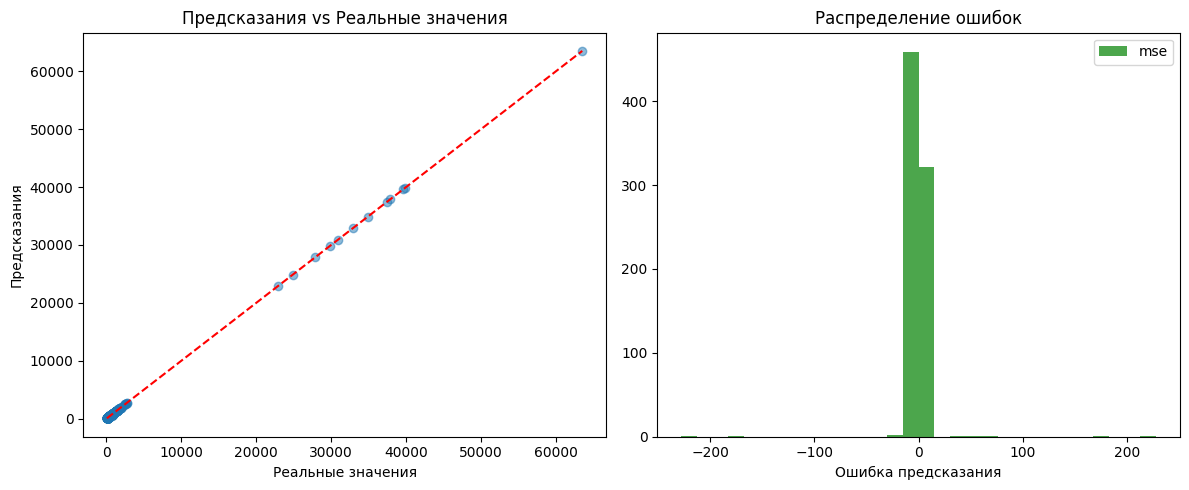

In [ ]:
import matplotlib.pyplot as plt

# График предсказаний vs реальных значений
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(y_usa_train,cv_usa, alpha= 0.5 )
plt.plot([y_usa_train.min(), y_usa_train.max()],
         [y_usa_train.min(),y_usa_train.max()], 'r--')
plt.title('Предсказания vs Реальные значения')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказания')

# График распределения ошибок
plt.subplot(1, 2, 2)
errors = cv_usa - y_usa_train
plt.hist(errors, bins=30, color='green', alpha=0.7, )
plt.title('Распределение ошибок')
plt.xlabel('Ошибка предсказания')
plt.legend()

plt.tight_layout()
plt.show()

### Решающие деревье

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



GBR_usa = Pipeline(
    [
        ('Scaler', StandardScaler()),
       ('Regressor', GradientBoostingRegressor())
    ]
)

In [104]:
GBR_usa.named_steps.Regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [121]:
search_GBR_usa = {
    "Regressor__max_depth" : [3, 4, 5, 6, 7, 8, 10], 
    'Regressor__n_estimators' : [100, 200, 300, 500, 1000],
    'Regressor__min_samples_leaf' : [2],
    'Regressor__loss': ['squared_error'],
    'Regressor__min_samples_split' : [5,6,7,8,9,10],
    'Regressor__min_samples_leaf' : [5],
     'Regressor__subsample': [0.8],
      'Regressor__max_features': ['sqrt']
}

In [122]:
search_usa = GridSearchCV(
    estimator=GBR_usa,
    param_grid=search_GBR_usa,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs= -1
)

попробуй удалить названия моделей и их бренд ??

In [123]:
search_usa.fit(X_usa_train, y_usa_train)
print(f'Лучшие праметры {search_usa.best_params_}')
print(f'Лучшее значение {search_usa.best_score_:.3f}')


Лучшие праметры {'Regressor__loss': 'squared_error', 'Regressor__max_depth': 6, 'Regressor__max_features': 'sqrt', 'Regressor__min_samples_leaf': 5, 'Regressor__min_samples_split': 5, 'Regressor__n_estimators': 1000, 'Regressor__subsample': 0.8}
Лучшее значение -1139375.155
